In [5]:
# Import library
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from itertools import tee, islice
import nltk

# Unduh resource tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')   # ← tambahan penting agar tokenisasi berjalan


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [6]:
# 1️ Baca dataset
data = pd.read_csv("/content/hasil_preprocessing.csv")


In [16]:
# --- 🔹 NORMALISASI KATA HANYA UNTUK KOLOM 'ulasan_bersih' ---

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # untuk Colab versi baru

# Kamus sederhana untuk normalisasi kata tidak baku → baku
normalisasi = {
    "gk": "tidak", "ga": "tidak", "nggak": "tidak", "ngga": "tidak",
    "bgt": "banget", "tp": "tapi", "yg": "yang", "dgn": "dengan",
    "sm": "sama", "aja": "saja", "blm": "belum", "udh": "sudah",
    "sdh": "sudah", "dr": "dari", "krn": "karena", "trs": "terus"
}

# Fungsi normalisasi
def normalisasi_kata(teks):
    tokens = nltk.word_tokenize(str(teks))
    hasil = [normalisasi.get(kata.lower(), kata.lower()) for kata in tokens]
    return " ".join(hasil)

# 🔹 Tampilkan data sebelum normalisasi
print("=== DATA SEBELUM NORMALISASI ===")
print(data[["ulasan_bersih"]].head(10))

# 🔹 Terapkan normalisasi pada kolom 'ulasan_bersih'
data["teks_normal"] = data["ulasan_bersih"].apply(normalisasi_kata)

# 🔹 Tampilkan data sesudah normalisasi
print("\n=== DATA SESUDAH NORMALISASI ===")
print(data[["ulasan_bersih", "teks_normal"]].head(10))


=== DATA SEBELUM NORMALISASI ===
                                       ulasan_bersih
0  recommended to find second laptop like new and...
1          second laptop recomended secon like a new
2                                                NaN
3                                        recommended
4  recommend for all who want to buy newest lapto...
5                                                NaN
6  recommend for all who want to buy newest lapto...
7             decent place to shop and great service
8                              good price and humble
9                                             kerenn

=== DATA SESUDAH NORMALISASI ===
                                       ulasan_bersih  \
0  recommended to find second laptop like new and...   
1          second laptop recomended secon like a new   
2                                                NaN   
3                                        recommended   
4  recommend for all who want to buy newest lapto...   
5             

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [20]:
# HAPUS DUPLIKAT DATA ---

# Tampilkan jumlah data sebelum menghapus duplikat
print("\n=== SEBELUM MENGHAPUS DUPLIKAT ===")
print("Jumlah data:", len(data))
print(data[["ulasan_bersih", "teks_normal"]].head(10))

# Hapus duplikat berdasarkan kolom 'teks_normal'
data = data.drop_duplicates(subset="teks_normal", keep="first")

# Reset index setelah penghapusan
data = data.reset_index(drop=True)

# Tampilkan jumlah data setelah menghapus duplikat
print("\n=== SETELAH MENGHAPUS DUPLIKAT ===")
print("Jumlah data:", len(data))
print(data[["ulasan_bersih", "teks_normal"]].head(10))



=== SEBELUM MENGHAPUS DUPLIKAT ===
Jumlah data: 1181
                                       ulasan_bersih  \
0  recommended to find second laptop like new and...   
1          second laptop recomended secon like a new   
2                                                NaN   
3                                        recommended   
4  recommend for all who want to buy newest lapto...   
5             decent place to shop and great service   
6                              good price and humble   
7                                             kerenn   
8  great place to search a second hand laptop wit...   
9                  recommended place to buy a laptop   

                                         teks_normal  
0  recommended to find second laptop like new and...  
1          second laptop recomended secon like a new  
2                                                nan  
3                                        recommended  
4  recommend for all who want to buy newest lapto...  

In [21]:
#MEMBUAT BIGRAM DAN TRIGRAM DARI KOLOM 'teks_normal' ---

from itertools import tee, islice
import nltk

# Pastikan tokenizer tersedia
nltk.download('punkt')
nltk.download('punkt_tab')  # untuk Colab versi baru

#  Fungsi untuk membuat n-gram
def ngrams(tokens, n):
    tl1, tl2 = tee(tokens)
    for _ in range(n - 1):
        next(tl2, None)
    return zip(*(islice(it, i, None) for i, it in enumerate((tl1,) * n)))

# Tokenisasi teks hasil normalisasi
data["tokens"] = data["teks_normal"].apply(lambda x: nltk.word_tokenize(str(x)))

# Gabungkan semua token ke dalam satu list besar
all_tokens = [kata for sublist in data["tokens"] for kata in sublist]

# Buat Bigram dan Trigram
bigrams = list(ngrams(all_tokens, 2))
trigrams = list(ngrams(all_tokens, 3))

# TAMPILKAN HASILNYA
print("=== CONTOH HASIL BIGRAM ===")
for i, bg in enumerate(bigrams[:15], 1):
    print(f"{i}. {bg}")

print("\n=== CONTOH HASIL TRIGRAM ===")
for i, tg in enumerate(trigrams[:15], 1):
    print(f"{i}. {tg}")

# Tampilkan jumlah total
print("\nTotal Bigram:", len(bigrams))
print("Total Trigram:", len(trigrams))


=== CONTOH HASIL BIGRAM ===
1. ('recommended', 'find')
2. ('second', 'laptop')
3. ('like', 'new')
4. ('and', 'good')
5. ('condition', 'second')
6. ('laptop', 'recomended')
7. ('secon', 'like')
8. ('a', 'new')
9. ('nan', 'recommended')
10. ('recommend', 'for')
11. ('all', 'who')
12. ('want', 'to')
13. ('buy', 'newest')
14. ('laptop', 'with')
15. ('affordable', 'price')

=== CONTOH HASIL TRIGRAM ===
1. ('recommended', 'find', 'like')
2. ('new', 'and', 'good')
3. ('condition', 'second', 'laptop')
4. ('recomended', 'secon', 'like')
5. ('a', 'new', 'nan')
6. ('recommended', 'recommend', 'for')
7. ('all', 'who', 'want')
8. ('to', 'buy', 'newest')
9. ('laptop', 'with', 'affordable')
10. ('price', 'decent', 'place')
11. ('to', 'shop', 'and')
12. ('great', 'service', 'good')
13. ('price', 'and', 'humble')
14. ('kerenn', 'great', 'place')
15. ('to', 'search', 'a')

Total Bigram: 4252
Total Trigram: 2834


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


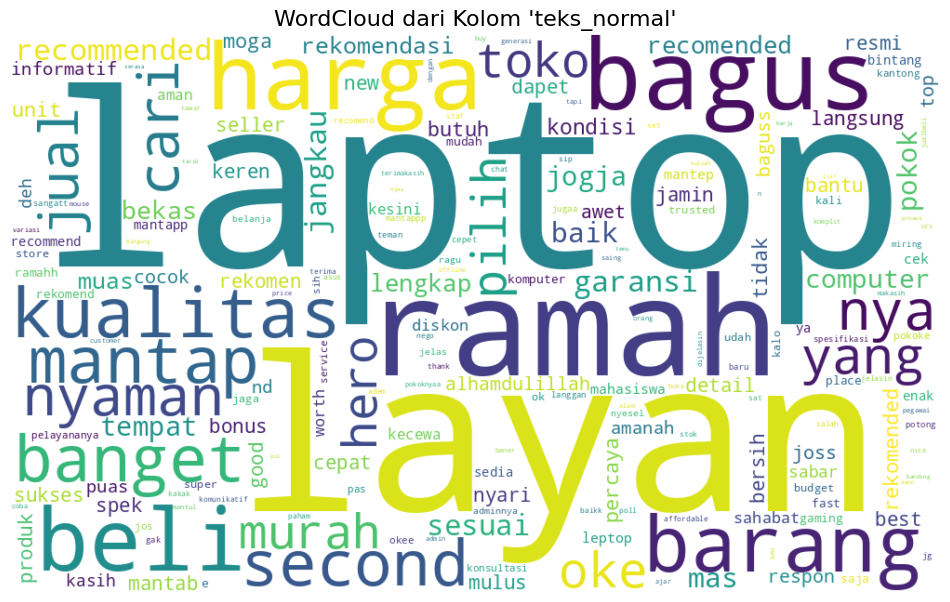

✅ WordCloud berhasil dibuat dan disimpan sebagai 'wordcloud_ulasan.png'


In [22]:
# MEMBUAT WORDCLOUD DARI KOLOM 'teks_normal'

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan semua teks hasil normalisasi menjadi satu string besar
gabungan_teks = " ".join(data["teks_normal"].astype(str))

# Buat WordCloud
wordcloud = WordCloud(
    width=1000,
    height=600,
    background_color="white",
    max_words=200,
    collocations=False,  # agar tidak menggabungkan kata berulang
    colormap="viridis"
).generate(gabungan_teks)

# Tampilkan WordCloud ---
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud dari Kolom 'teks_normal'", fontsize=16)
plt.show()

# Simpan WordCloud sebagai gambar PNG ---
wordcloud.to_file("wordcloud_ulasan.png")

print("✅ WordCloud berhasil dibuat dan disimpan sebagai 'wordcloud_ulasan.png'")


In [23]:
# SIMPAN HASIL PROSES KE FILE CSV

import pandas as pd

# Simpan data utama (ulasan bersih, hasil normalisasi, dan token)
data.to_csv("hasil_normalisasi_dan_token.csv", index=False)

# Simpan Bigram dan Trigram ke file terpisah
df_bigrams = pd.DataFrame(bigrams, columns=["Kata_1", "Kata_2"])
df_trigrams = pd.DataFrame(trigrams, columns=["Kata_1", "Kata_2", "Kata_3"])

df_bigrams.to_csv("hasil_bigram.csv", index=False)
df_trigrams.to_csv("hasil_trigram.csv", index=False)

print("✅ Semua data berhasil disimpan dalam format CSV:")
print(" - hasil_normalisasi_dan_token.csv")
print(" - hasil_bigram.csv")
print(" - hasil_trigram.csv")


✅ Semua data berhasil disimpan dalam format CSV:
 - hasil_normalisasi_dan_token.csv
 - hasil_bigram.csv
 - hasil_trigram.csv
